In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('temperatures(1).csv')

# Display the first few rows of the dataset
print(df.head())


   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (117, 18)


In [7]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


In [8]:
# Example preprocessing steps

# Drop rows with missing values
df = df.dropna()


In [11]:
# Define features (previous months) and target (temperature for January)
# You might need to adjust based on the prediction month
features = df[['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
target = df['JAN']

In [12]:
# Display the features and target
print(features.head())
print(target.head())

     FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC
0  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97  27.31  24.49
1  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12  26.31  24.04
2  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04  26.08  23.65
3  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20  26.36  23.63
4  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67  27.52  23.82
0    22.40
1    24.93
2    23.44
3    22.50
4    22.00
Name: JAN, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.2800780011850602
R-squared Score: 0.7284102625821574


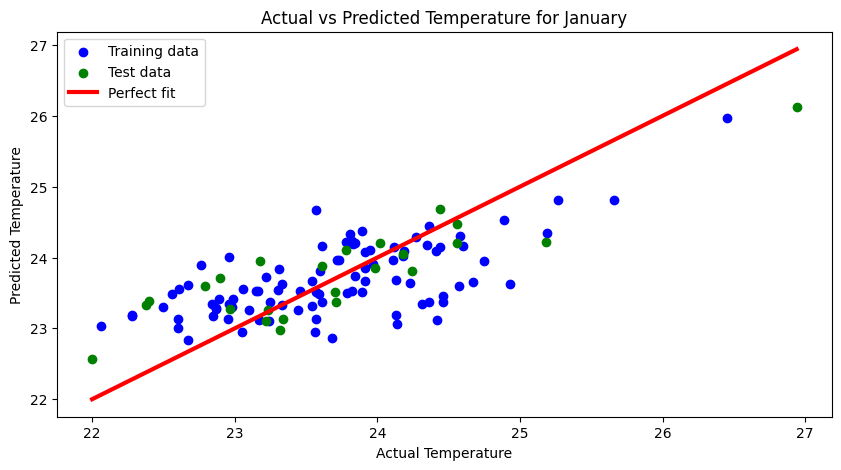

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the regression line
plt.figure(figsize=(10, 5))

# Plotting the training data
plt.scatter(y_train, model.predict(X_train), color='blue', label='Training data')

# Plotting the test data
plt.scatter(y_test, y_pred, color='green', label='Test data')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect fit')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature for January')
plt.legend()
plt.show()
